Scale generally means to change the range of the values. The shape of the distribution doesn’t change.

Standardize generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. Scaling is often implied.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing


%matplotlib inline
warnings.filterwarnings('ignore')

np.random.seed(34)

-> Use MinMaxScaler as your default
-> Use RobustScaler if you have outliers and can handle a larger range
-> Use StandardScaler if you need normalized features
-> Use Normalizer sparingly - it normalizes rows, not columns

# Original Distribution

In [2]:
#create columns of various distributions

df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

# make bimodal distribution
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

# create list of column names to use later
col_names = list(df.columns)

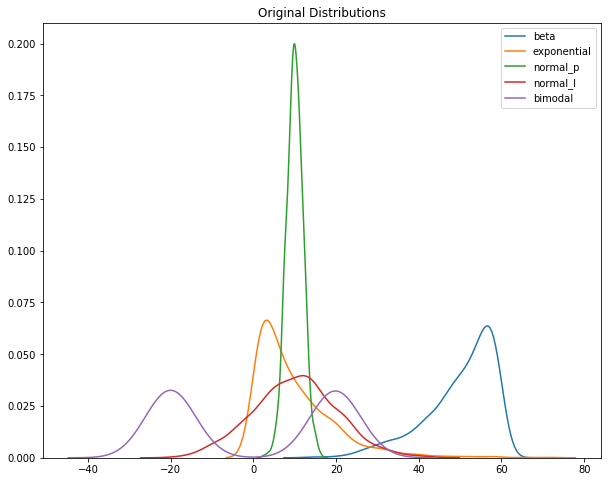

In [3]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);

In [4]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,39.273740,2.263890,11.860245,4.748207,19.496627
1,55.030395,13.108592,11.796582,10.959172,16.871186
2,47.434682,3.312019,11.146945,3.919227,12.655741
3,43.173536,17.664301,8.266689,42.072915,18.657904
4,45.681443,2.109760,5.112983,16.960664,22.646439


In [5]:
# Means of the dataframe

df.mean()

beta           50.024249
exponential    10.028387
normal_p        9.994006
normal_l       10.175745
bimodal        -0.076622
dtype: float64

In [7]:
# More statistics

df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745,-0.076622
std,8.474545,9.733928,2.013971,10.104004,20.165208
min,13.854022,0.007617,2.356844,-19.539980,-28.709856
25%,45.793283,2.951421,8.687478,3.566822,-19.995311
50%,52.337504,7.018565,9.983498,10.326331,0.237049
75%,56.722191,14.022485,11.306914,16.615057,19.891202
max,59.990640,71.344341,16.214364,42.072915,28.252151


In [8]:
df.skew()

beta          -1.188030
exponential    1.981316
normal_p      -0.067160
normal_l       0.063194
bimodal        0.002846
dtype: float64

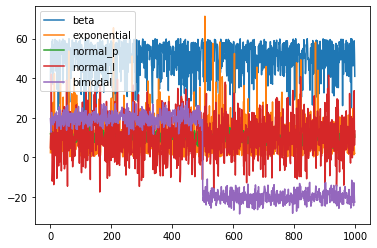

In [10]:
df.plot()

Adding a feature with much larger values

In [12]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
col_names.append('normal_big')

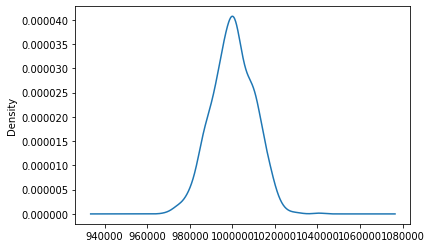

In [13]:
# Plotting the normal big 

df['normal_big'].plot(kind='kde')

Kde Plot is used for plotting multivariate distribution conveniently.

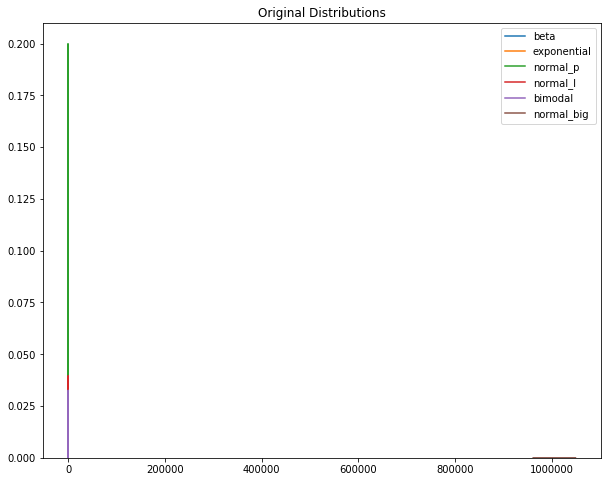

In [14]:
# plot distribution plot after adding big normal
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);
sns.kdeplot(df['normal_big'], ax=ax1)

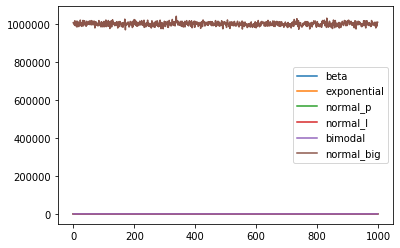

In [17]:
df.plot()

Now let's apply some scaling and see what happens. Let's begin with Min_Max scaler.

# MinMaxScaler

MinMaxScaler subtracts the column mean from each value and then divides by the range.

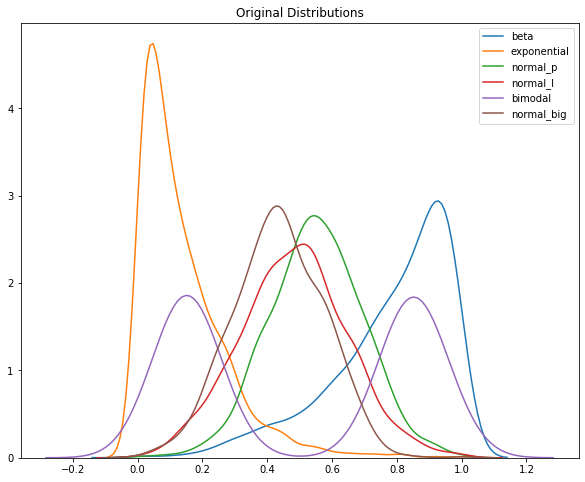

In [19]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1);
sns.kdeplot(df_mm['normal_big'], ax=ax1)

The distribution remains the same, whereas their values are between 0 and 1.

# RobustScaler

RobustScaler subtracts the column median and divides by the interquartile range.

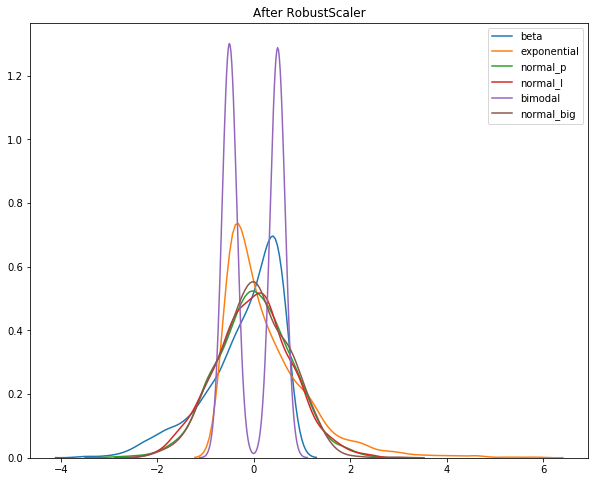

In [20]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
sns.kdeplot(df_r['bimodal'], ax=ax1)
sns.kdeplot(df_r['normal_big'], ax=ax1);

Although the range of values for each feature is much smaller than for the original features, it's larger and varies more than for MinMaxScaler.

# StandardScaler

StandardScaler is scales each column to have 0 mean and unit variance.

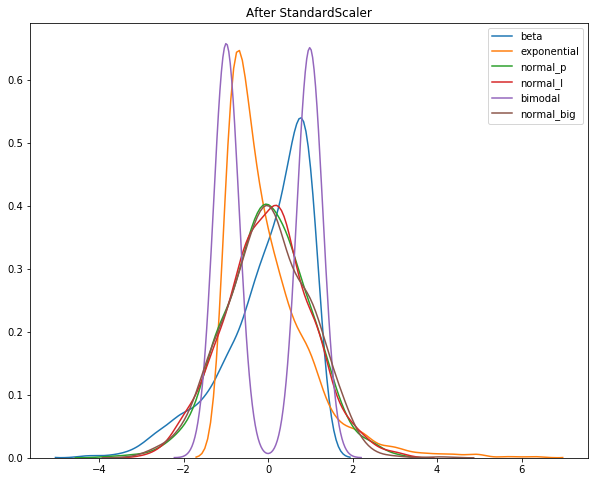

In [21]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
sns.kdeplot(df_s['bimodal'], ax=ax1)
sns.kdeplot(df_s['normal_big'], ax=ax1);

# Combined Plot

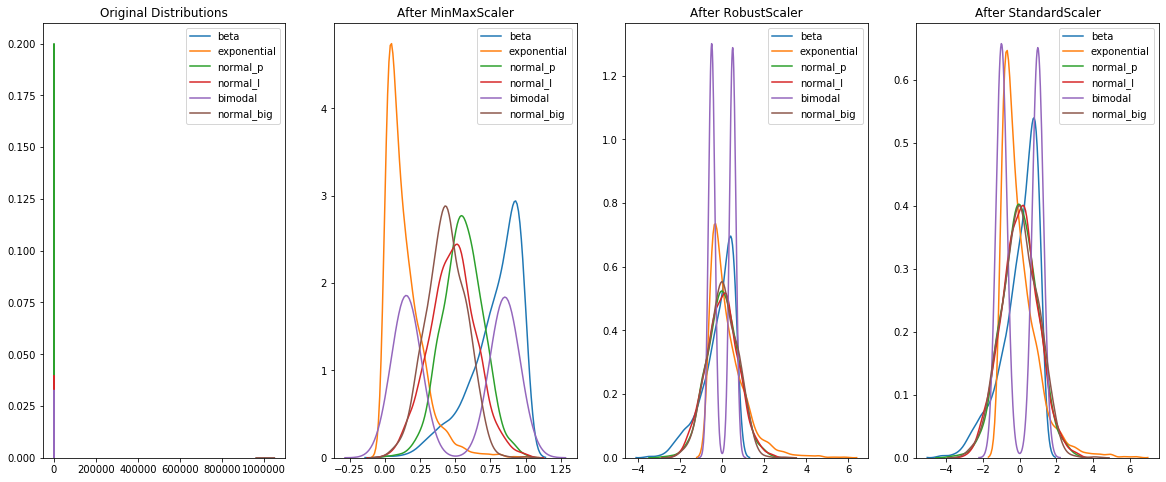

In [22]:
# Combined plot.

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 8))


ax0.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax0)
sns.kdeplot(df['exponential'], ax=ax0)
sns.kdeplot(df['normal_p'], ax=ax0)
sns.kdeplot(df['normal_l'], ax=ax0)
sns.kdeplot(df['bimodal'], ax=ax0)
sns.kdeplot(df['normal_big'], ax=ax0);


ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1);


ax2.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax2)
sns.kdeplot(df_r['exponential'], ax=ax2)
sns.kdeplot(df_r['normal_p'], ax=ax2)
sns.kdeplot(df_r['normal_l'], ax=ax2)
sns.kdeplot(df_r['bimodal'], ax=ax2)
sns.kdeplot(df_r['normal_big'], ax=ax2);


ax3.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax3)
sns.kdeplot(df_s['exponential'], ax=ax3)
sns.kdeplot(df_s['normal_p'], ax=ax3)
sns.kdeplot(df_s['normal_l'], ax=ax3)
sns.kdeplot(df_s['bimodal'], ax=ax3)
sns.kdeplot(df_s['normal_big'], ax=ax3);